# OMX Analysis


In [1]:
# Loading in standard libraries and functions

### --- REMOVE PRINT FUNCTION: --- ### 

# Makes it so any variable or statement on it's own line gets printed w/o print()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

### --- IMPORT LIBRARIES: --- ###

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
#import altair as alt
import os
import glob
import matplotlib.patches as mpatches
# We're also going to tell Jupyter to use inline plotting instead of notebook plotting
# It basically means you don't have to use plt.show() in every cell
%matplotlib inline
import re
from scipy.stats import chisquare

### --- CONJ 510 SUMMARY TABLES: --- ### 

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

#summary = fil.groupby('condition').agg(['mean', 'std', 'min', 'max', 'median', percentile(25), percentile(75), 'skew'])
#summary

### --- IMPORT SCIPY T TEST: --- ###

from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

### --- IND. T-TEST FUNCTION: --- ###
# source: https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/

def independent_ttest(data1, data2, alpha):
    # calculate means
    mean1, mean2 = mean(data1), mean(data2)
    # calculate standard errors
    se1, se2 = sem(data1), sem(data2)
    # standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

### --- 3D CARTESIAN DISTANCE FUNCTION: --- ###

# AB = sqrt((x2 - x1)^2  +   (y2 - y1)^2   +   (z2 - z1)^2)

def cart3D_dist(x1, x2, y1, y2, z1, z2):
    x_dif = x2-x1
    y_dif = y2-y1
    z_dif = z2-z1
    x_sqr = x_dif**2
    y_sqr = y_dif**2
    z_sqr = z_dif**2
    dist = sqrt(x_sqr + y_sqr + z_sqr)
    return dist

### --- FINDING UNIQUE COMBINATIONS FUNCTION: --- ###

# Based on the mathematical concept of finding unique combinations without selecting the same option again. 
# n is the dataset to be pulled from
# r is the number of data to select from the dataset 
def find_combos(n, r):
    return (math.factorial(n))/((math.factorial(r))*(math.factorial(n-r)))

### --- ANGLE BETWEEN TWO 2D LINES FUNCTION: --- ###

import math

# defining function for calculating angle of rotation between 2 2D lines
def find_angle(m1, m2): 
    angle = math.degrees(math.atan(abs((m1 - m2)/(1 + m1*m2))))
    return angle

### --- SLOPE BETWEEN TWO POINTS ON A 2D LINE FUNCTION: --- ###

# defining a function to calculate slope

def find_slope(y2, y1, x2, x1):
    m = (y2 - y1)/(x2 - x1)
    return m

### --- SET UP FOR A FIGURE: --- ###

# fig1, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(ncols = 2,
#                                                         nrows = 3,
#                                                         sharex = False,
#                                                         sharey = True,
#                                                         figsize = (40,50))

#titlefont = 40 # sets font size 
#axisfont = 30
#plt.rc('xtick', labelsize=25) 
#plt.rc('ytick', labelsize=25) 
#palette = ['#5DADE2', '#EC7063', '#F8C471']
#fig_title = 'ACD Timing in WT and pp4KO neuroblasts'


### --- SET UP FOR CUSTOM LEGENDS --- ###

#colors = ["g", "w"]
#texts = ["Green Data Description", "RedData Description"]
#patches = [ mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
#plt.legend(handles=patches, bbox_to_anchor=(0.5, 0.5), loc='center', ncol=2 )


### --- color palettes --- ###

# p = ['#3386FF', '#FF5733'] # classic blue and orange from the rotation saga
# ['#3386FF', '#143566', 'grey'] # hex codes for blue, dark blue, grey
# ['#FF5733', '#99341e', 'grey'] # hex codes for orange, dark orange, grey
# ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000'] #blue, purple, magenta, orange, and yellow palette for color blindness

### --- PLOT STYLES: --- ###

plt.style.use('fast') # uses seaborn style
#sns.set_style('white') # uses blank white background style (to copy PRISM)

### --- REMOVING DATAFRAME VIEW LIMITS --- ###
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

## Command line cells to ensure code is in right directory. 

In [2]:
pwd

'/Users/rcsegura/Desktop/PP4_github/SuppFig4'

In [3]:
ls

SuppFig4 data.xlsx  SuppFig4.ipynb      readme.md


In [4]:
home_dir = '/Users/rcsegura/Desktop/PP4_github/SuppFig4'
#data_dir = home_dir + '/data/'
#figs_dir = home_dir + '/figs/'
#outs_dir = home_dir + '/output/'

In [5]:
# reading in data
os.chdir(home_dir)
data = pd.read_excel('SuppFig4 data.xlsx', sheet_name = 'Supp Fig4')
# Drop rows where the first column has NaN values
data = data.dropna(subset=[data.columns[4]])
data

,Unnamed: 0,File Name,Nb #,Genotype,phase,min slice,max slice,Daughter Asl Area,Daughter Asl Mean,Daughter Asl Mode,...,Mother Cnb IntDensity,Mother Cnb RawIntDen,Integrated Density - Asl D/M,Integrated Density - Cnb D/M,Daughter Asl/Area,Mother Asl/Area,"Asl D/M, Area Adjusted",Daughter Cnb/Area,Mother Cnb/Area,"Cnb D/M, Area Adjusted"
0,0,PP4KO_males_11_28_batch_MTs405_Asl568_Cnb488_0...,Nb4,PP4KO,telophase,7.0,26.0,0.120,138374.312,122897.067,...,1896.108,1185067.687,0.660480,2.575080,8.648394e+07,8.927795e+07,0.968704,40688.583333,6.733339e+06,0.006043
2,2,PP4KO_males_11_28_batch_MTs405_Asl568_Cnb488_0...,Nb10,PP4KO,telophase,5.0,17.0,0.157,189409.456,197010.980,...,2673.467,1670916.851,0.986553,0.338454,1.123467e+08,1.182301e+08,0.950238,5551.196319,1.064278e+07,0.000522
3,3,PP4KO_males_11_28_batch_MTs405_Asl568_Cnb488_1...,Nb9,PP4KO,telophase,17.0,31.0,0.093,400969.736,294351.367,...,400.671,250419.475,0.944460,0.928083,2.500671e+08,2.564986e+08,0.974926,3998.451613,2.608536e+06,0.001533
4,4,PP4KO_males_11_28_batch_MTs405_Asl568_Cnb488_1...,Nb5,PP4KO,telophase,28.0,54.0,0.203,122219.910,101424.261,...,2542.080,1602150.986,0.763890,0.444357,8.074599e+07,7.706477e+07,1.047768,7632.378378,7.892369e+06,0.000967
5,5,PP4KO_males_11_28_batch_MTs405_Asl568_Cnb488_1...,Nb8,PP4KO,telophase,29.0,59.0,0.160,105670.076,101550.239,...,1436.653,897908.149,0.769844,2.415727,6.604380e+07,6.795128e+07,0.971929,21691.012500,4.445090e+06,0.004880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,180,RCS_phosCnb488_MTs568_Asl647_1515_013_SIR_ALX_...,Nb3,phospho-Cnb,prometaphase,1.0,45.0,0.038,338480.500,256779.402,...,2524.238,1587571.083,0.264393,0.280136,2.137772e+08,2.871512e+08,0.744476,18608.710526,1.483711e+07,0.001254
181,181,RCS_phosCnb488_MTs568_Asl647_1515_013_SIR_ALX_...,Nb3,phospho-Cnb,prometaphase,1.0,45.0,0.033,352855.174,142782.833,...,1375.692,865215.309,0.424948,0.507846,2.245442e+08,1.959249e+08,1.146073,21170.909091,9.721520e+06,0.002178
182,182,RCS_phosCnb488_MTs568_Asl647_1515_013_SIR_ALX_...,Nb4,phospho-Cnb,metaphase,1.0,42.0,0.072,388508.857,218177.505,...,2597.000,1633333.520,0.490609,0.507980,2.428180e+08,3.330382e+08,0.729100,18322.541667,1.526480e+07,0.001200
183,183,RCS_phosCnb488_MTs568_Asl647_1515_013_SIR_ALX_...,Nb5,phospho-Cnb,metaphase,22.0,67.0,0.091,461395.117,277819.642,...,1468.949,918092.844,0.674029,0.719675,2.890057e+08,2.747772e+08,1.051782,11617.208791,6.465443e+06,0.001797


# Determining columns to pull out
- I want the file name, Nb#, Genotype, phase, Raw mother and daughter values, background values, Adjusted mother and daughter values...
- i'll have to make a list of the columns and then use that to pull out what's needed. 

In [6]:
# Drop columns based on positions
drop = [0] + list(range(21, 30)) + list(range(44, 51)) + [65] + list(range(80, 84)) + [92]
filt_data = data.drop(data.columns[drop], axis=1).reset_index()
filt_data.head(5)
#filt_data.columns

,index,File Name,Nb #,Genotype,phase,min slice,max slice,Daughter Asl Area,Daughter Asl Mean,Daughter Asl Mode,...,Mother Cnb IntDensity,Mother Cnb RawIntDen,Integrated Density - Asl D/M,Integrated Density - Cnb D/M,Daughter Asl/Area,Mother Asl/Area,"Asl D/M, Area Adjusted",Daughter Cnb/Area,Mother Cnb/Area,"Cnb D/M, Area Adjusted"
0,0,PP4KO_males_11_28_batch_MTs405_Asl568_Cnb488_0...,Nb4,PP4KO,telophase,7.0,26.0,0.120,138374.312,122897.067,...,1896.108,1185067.687,0.660480,2.575080,8.648394e+07,8.927795e+07,0.968704,40688.583333,6.733339e+06,0.006043
1,2,PP4KO_males_11_28_batch_MTs405_Asl568_Cnb488_0...,Nb10,PP4KO,telophase,5.0,17.0,0.157,189409.456,197010.980,...,2673.467,1670916.851,0.986553,0.338454,1.123467e+08,1.182301e+08,0.950238,5551.196319,1.064278e+07,0.000522
2,3,PP4KO_males_11_28_batch_MTs405_Asl568_Cnb488_1...,Nb9,PP4KO,telophase,17.0,31.0,0.093,400969.736,294351.367,...,400.671,250419.475,0.944460,0.928083,2.500671e+08,2.564986e+08,0.974926,3998.451613,2.608536e+06,0.001533
3,4,PP4KO_males_11_28_batch_MTs405_Asl568_Cnb488_1...,Nb5,PP4KO,telophase,28.0,54.0,0.203,122219.910,101424.261,...,2542.080,1602150.986,0.763890,0.444357,8.074599e+07,7.706477e+07,1.047768,7632.378378,7.892369e+06,0.000967
4,5,PP4KO_males_11_28_batch_MTs405_Asl568_Cnb488_1...,Nb8,PP4KO,telophase,29.0,59.0,0.160,105670.076,101550.239,...,1436.653,897908.149,0.769844,2.415727,6.604380e+07,6.795128e+07,0.971929,21691.012500,4.445090e+06,0.004880


# Defining what's what for plotting
- Ratios are in `Adjusted Cnb D/M Ratio` and `Adjusted Asl D/M Ratio`.
    - This adjustment comes from a previous script that determines centriole identity based on asterless intensity.  
- IntDen values are in `Daughter Cnb IntDensity`, `Mother Cnb IntDensity`, `Daughter Asl IntDensity`, `Mother Asl IntDensity`.
- Background intDen values are in `Daughter Cnb IntDen background` and `Daughter Asl IntDen background`.
- This then spits out a csv to the output folder titled "processed data.csv" that includes the definition of enrichment based on the logic gates applied here. 


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define color palette for color blindness
palette = {'Daughter Cnb IntDensity': '#648FFF', 'Mother Cnb IntDensity': '#FFB000', 'average Cnb IntDen background': 'grey'}

# Calculate the average background intensity
filt_data['average Cnb IntDen background'] = ''
for i in range(0, len(filt_data)):
    numbers = [filt_data.loc[i, 'Daughter Cnb IntDen background'], filt_data.loc[i, 'Mother Cnb IntDen background']]
    filt_data.loc[i, 'average Cnb IntDen background'] = np.mean(numbers)

# Reshape the data to a "long" format using pd.melt
filt_melted = pd.melt(filt_data, 
                      id_vars=['File Name', 'phase', 'Genotype'],  # Include 'Genotype' as an identifier
                      value_vars=['Daughter Cnb IntDensity', 'Mother Cnb IntDensity', 'average Cnb IntDen background'],
                      var_name='Intensity Type',  # Name of the column for melted variable types
                      value_name='Intensity')  # Name of the column for values

filt_melted.head(5)

,File Name,phase,Genotype,Intensity Type,Intensity
0,PP4KO_males_11_28_batch_MTs405_Asl568_Cnb488_0...,telophase,PP4KO,Daughter Cnb IntDensity,4882.63
1,PP4KO_males_11_28_batch_MTs405_Asl568_Cnb488_0...,telophase,PP4KO,Daughter Cnb IntDensity,904.845
2,PP4KO_males_11_28_batch_MTs405_Asl568_Cnb488_1...,telophase,PP4KO,Daughter Cnb IntDensity,371.856
3,PP4KO_males_11_28_batch_MTs405_Asl568_Cnb488_1...,telophase,PP4KO,Daughter Cnb IntDensity,1129.592
4,PP4KO_males_11_28_batch_MTs405_Asl568_Cnb488_1...,telophase,PP4KO,Daughter Cnb IntDensity,3470.562


In [8]:
# I now want to loop through the data, and determine the individual D and M values relative to the background. 

filt_data['Daughter Cnb IntDen / background'] = '' # empty column for the daughter
filt_data['Mother Cnb IntDen / background'] = '' # empty column for the mother
filt_data['enrichment?'] = '' # empty column for determining enrichment
filt_data['d/m'] = '' # empty column for ratio after normalizing

threshold = 1.03 # value determined by finding % variation in 60 background measurements in one cell. I.e., threshold is +/- 3% of background value. 

for i in range(0, len(filt_data)): # initializes loop 
    filt_data.loc[i, 'Daughter Cnb IntDen - background'] = filt_data.loc[i, 'Daughter Cnb IntDen'] - filt_data.loc[i, 'average Cnb IntDen background'] # normalizes daughter
    filt_data.loc[i, 'Mother Cnb IntDen - background'] = filt_data.loc[i, 'Mother Cnb IntDen'] - filt_data.loc[i, 'average Cnb IntDen background'] # normalizes mother

    d = filt_data.loc[i, 'Daughter Cnb IntDensity'] # sets daughter  value to variable
    m = filt_data.loc[i, 'Mother Cnb IntDensity'] # sets mother  value to variable
    b = filt_data.loc[i, 'average Cnb IntDen background'] * threshold # sets variable to background value
    r = (d-b)/(m-b)
    #filt_data.loc[i, 'd/m'] = r

    if d > b and d > m:
        filt_data.loc[i, 'enrichment?'] = 'Daughter'
        if m > b:
            filt_data.loc[i, 'd/m'] = (d-b)/(m-b)
        elif m < b:
            filt_data.loc[i, 'd/m'] = (d)/(b)

    elif m > b and m > d:
        filt_data.loc[i, 'enrichment?'] = 'Mother'
        if d > b:
            filt_data.loc[i, 'd/m'] = (d-b)/(m-b)
        elif d < b:
            filt_data.loc[i, 'd/m'] = (b)/(m)

    elif d < b and m < b:
        filt_data.loc[i, 'enrichment?'] = 'None'
        filt_data.loc[i, 'd/m'] = (d-b)/(m-b)

# second loop to catch instances where ratio = ~1 to re-bin them as symmetric
for i in range(0, len(filt_data)): # initializes loop 
    filt_data['d/m'] = pd.to_numeric(filt_data['d/m'], errors='coerce')
    ratio = filt_data.loc[i, 'd/m']
    if ratio < 1.1 and ratio > 0.8: # sets cut-offs for symmetric ratio
        filt_data.loc[i, 'enrichment?'] = 'Symmetric'
 
filt_data
#os.chdir(outs_dir)
#filt_data.to_csv('processed_data.csv')

,index,File Name,Nb #,Genotype,phase,min slice,max slice,Daughter Asl Area,Daughter Asl Mean,Daughter Asl Mode,...,Daughter Cnb/Area,Mother Cnb/Area,"Cnb D/M, Area Adjusted",average Cnb IntDen background,Daughter Cnb IntDen / background,Mother Cnb IntDen / background,enrichment?,d/m,Daughter Cnb IntDen - background,Mother Cnb IntDen - background
0,0,PP4KO_males_11_28_batch_MTs405_Asl568_Cnb488_0...,Nb4,PP4KO,telophase,7.0,26.0,0.120,138374.312,122897.067,...,40688.583333,6.733339e+06,0.006043,856.595,,,Daughter,3.945825,4026.0350,1039.5130
1,2,PP4KO_males_11_28_batch_MTs405_Asl568_Cnb488_0...,Nb10,PP4KO,telophase,5.0,17.0,0.157,189409.456,197010.980,...,5551.196319,1.064278e+07,0.000522,566.195,,,Mother,0.153885,2107.2720,338.6500
2,3,PP4KO_males_11_28_batch_MTs405_Asl568_Cnb488_1...,Nb9,PP4KO,telophase,17.0,31.0,0.093,400969.736,294351.367,...,3998.451613,2.608536e+06,0.001533,476.214,,,None,1.320775,-104.3580,-75.5430
3,4,PP4KO_males_11_28_batch_MTs405_Asl568_Cnb488_1...,Nb5,PP4KO,telophase,28.0,54.0,0.203,122219.910,101424.261,...,7632.378378,7.892369e+06,0.000967,973.813,,,Mother,0.082235,1568.2670,155.7790
4,5,PP4KO_males_11_28_batch_MTs405_Asl568_Cnb488_1...,Nb8,PP4KO,telophase,29.0,59.0,0.160,105670.076,101550.239,...,21691.012500,4.445090e+06,0.004880,943.278,,,Daughter,5.373277,2527.2840,493.3750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,180,RCS_phosCnb488_MTs568_Asl647_1515_013_SIR_ALX_...,Nb3,phospho-Cnb,prometaphase,1.0,45.0,0.038,338480.500,256779.402,...,18608.710526,1.483711e+07,0.001254,716.0525,,,Mother,0.292181,-8.9215,1808.1855
149,181,RCS_phosCnb488_MTs568_Asl647_1515_013_SIR_ALX_...,Nb3,phospho-Cnb,prometaphase,1.0,45.0,0.033,352855.174,142782.833,...,21170.909091,9.721520e+06,0.002178,586.3835,,,Mother,0.122668,112.2565,789.3085
150,182,RCS_phosCnb488_MTs568_Asl647_1515_013_SIR_ALX_...,Nb4,phospho-Cnb,metaphase,1.0,42.0,0.072,388508.857,218177.505,...,18322.541667,1.526480e+07,0.001200,799.8825,,,Mother,0.279363,519.3405,1797.1175
151,183,RCS_phosCnb488_MTs568_Asl647_1515_013_SIR_ALX_...,Nb5,phospho-Cnb,metaphase,22.0,67.0,0.091,461395.117,277819.642,...,11617.208791,6.465443e+06,0.001797,890.1845,,,Mother,0.254096,166.9815,578.7645


# Percent distribution of Cnb enrichment
- These blocks figure out the percent break down of daughter enriched, mother enriched, symmetrically enriched, and empty centrioles in all of the genotypes and cell cycle phases.
- After summarizing this as a table, it spits it out into the output directory as a csv named "OMX percents.csv". 

In [9]:
# Group by 'Genotype' and 'enrichment?' and count occurrences
counts = filt_data.groupby(['Genotype', 'phase', 'enrichment?']).size().reset_index(name='count')
counts
basket = [] # landing basket for frames
for i in range(0, len(counts['Genotype'].unique())): # loop to percent normalize
    gene = counts['Genotype'].unique()[i]
    #gene
    
    for v in range(0, len(counts['phase'].unique())):
        phase = counts['phase'].unique()[v]
        wf = counts[(counts['Genotype']==gene) & (counts['phase']==phase)]
        #wf
        sum = wf['count'].sum()
        #sum
        wf['percent'] = wf['count']/sum
        #wf
        basket.append(wf)

counts = pd.concat(basket)
counts

,Genotype,phase,enrichment?,count
0,PP4KO,anaphase,None,3
1,PP4KO,anaphase,Symmetric,1
2,PP4KO,metaphase,Daughter,2
3,PP4KO,metaphase,Mother,3
4,PP4KO,metaphase,None,3
5,PP4KO,metaphase,Symmetric,1
6,PP4KO,prometaphase,None,6
7,PP4KO,prometaphase,Symmetric,1
8,PP4KO,prophase,Mother,8
9,PP4KO,prophase,Symmetric,3


/var/folders/7j/kpbznrn516x6ztdnl0mk04w80000gn/T/ipykernel_13785/1105621271.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wf['percent'] = wf['count']/sum
/var/folders/7j/kpbznrn516x6ztdnl0mk04w80000gn/T/ipykernel_13785/1105621271.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wf['percent'] = wf['count']/sum
/var/folders/7j/kpbznrn516x6ztdnl0mk04w80000gn/T/ipykernel_13785/1105621271.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,Genotype,phase,enrichment?,count,percent
0,PP4KO,anaphase,None,3,0.750000
1,PP4KO,anaphase,Symmetric,1,0.250000
2,PP4KO,metaphase,Daughter,2,0.222222
3,PP4KO,metaphase,Mother,3,0.333333
4,PP4KO,metaphase,None,3,0.333333
5,PP4KO,metaphase,Symmetric,1,0.111111
6,PP4KO,prometaphase,None,6,0.857143
7,PP4KO,prometaphase,Symmetric,1,0.142857
8,PP4KO,prophase,Mother,8,0.727273
9,PP4KO,prophase,Symmetric,3,0.272727


## Generating Supplemental Figure 5A
- This block plots the mother, daughter, and background intensity in each genotype in each cell cycle phase.
- This is done to visually show how the determination of enrichment was done. 

/Applications/anaconda3/envs/tester/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


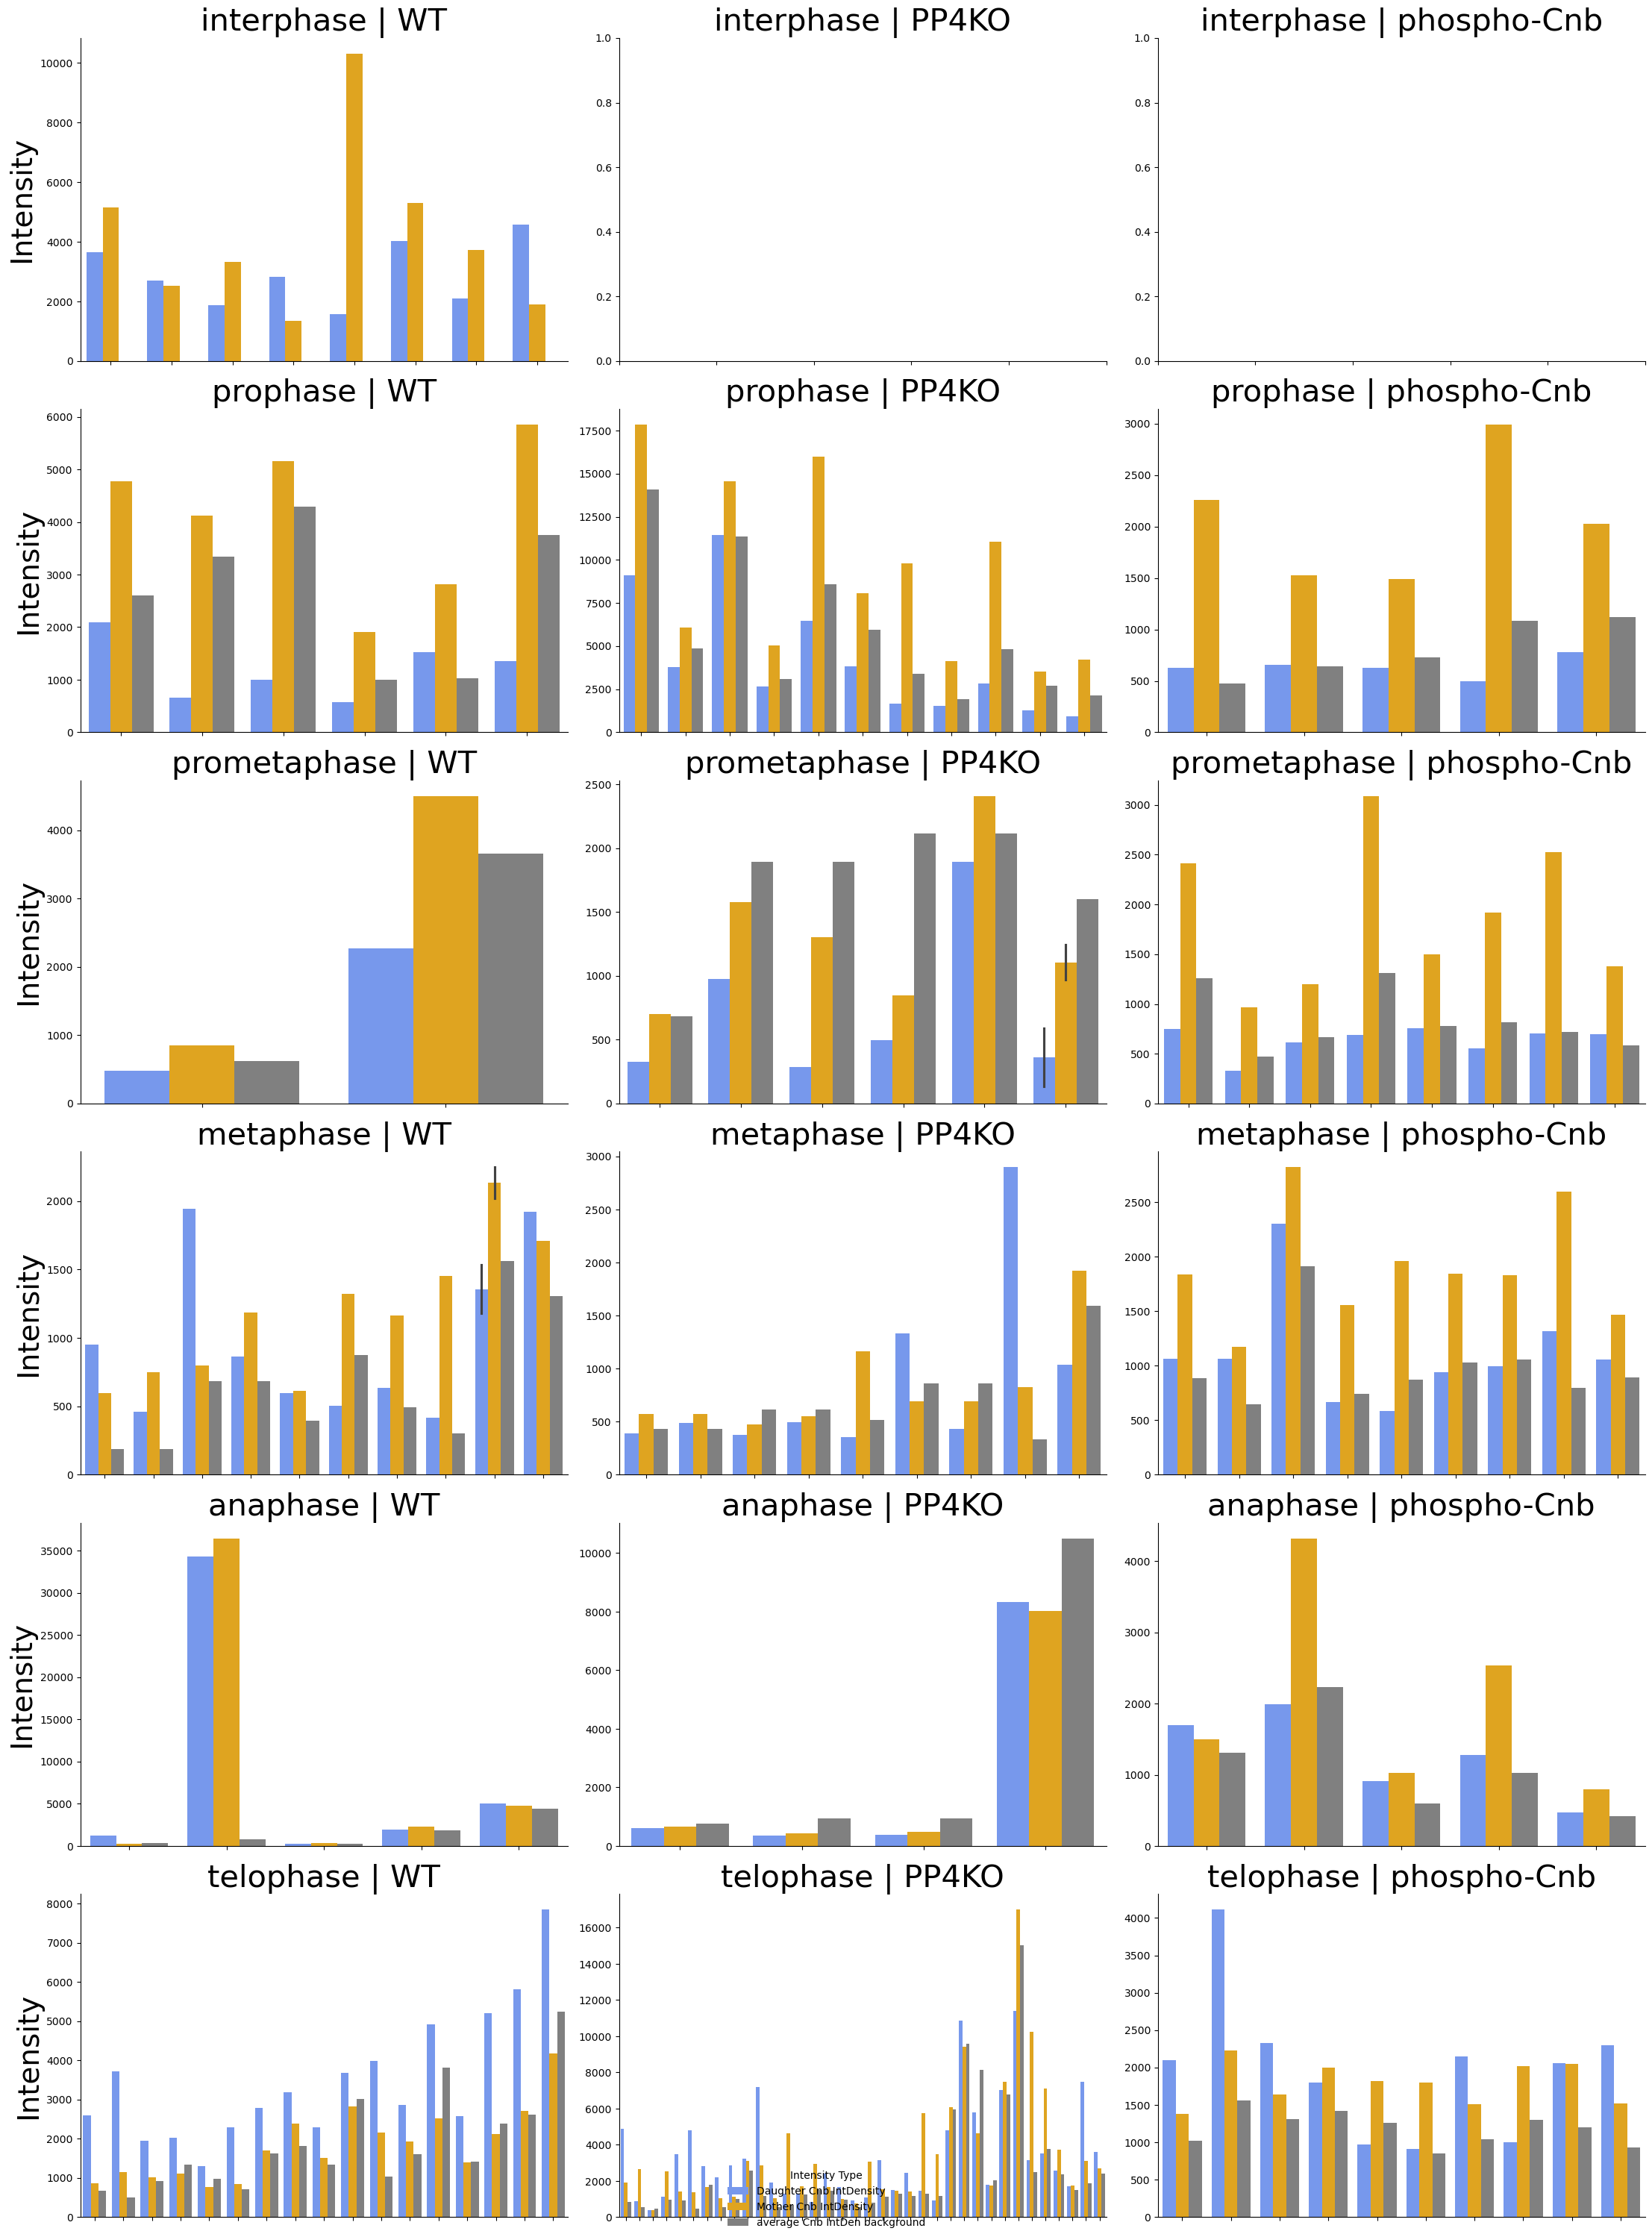

In [10]:
# Define the desired order for rows and columns
col_order = ["WT", "PP4KO", "phospho-Cnb"]
row_order = ["interphase", "prophase", "prometaphase", "metaphase", "anaphase", "telophase"]

# Create a FacetGrid with the specified row and column order
g = sns.FacetGrid(
    filt_melted, 
    row='phase', 
    col='Genotype', 
    height=5, 
    aspect=1.5, 
    sharey=False, 
    sharex=False, 
    col_order=col_order, 
    row_order=row_order
)

# Map the barplot to each facet
g.map_dataframe(
    sns.barplot, 
    x='File Name', 
    y='Intensity', 
    hue='Intensity Type', 
    palette=palette, 
    dodge=True
)

# Adjust the legend, titles, and layout
g.add_legend(title='Intensity Type', loc = 'lower center')
g.set_titles(row_template='{row_name}', col_template='{col_name}')

# Adjust the font size of all titles directly 
for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=30)

g.set_axis_labels('', 'Intensity', fontsize = 28)
g.set_xticklabels([], rotation=90)
g.tight_layout()

# Show the plot
#os.chdir(figs_dir)
#plt.savefig('supplemental_bar_graphs.svg', dpi=600)
plt.show();


## Generating Supplemental Figure 5B-5E

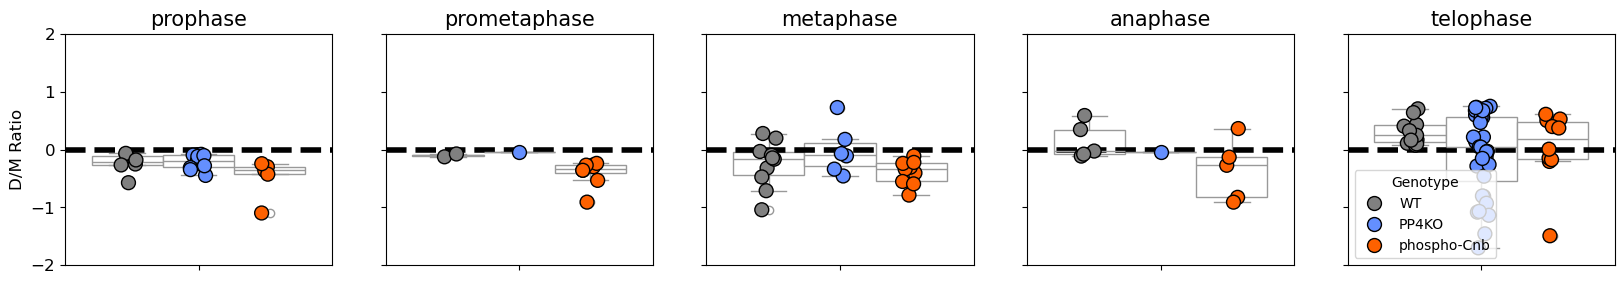

In [11]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols = 5,
                                                         nrows = 1,
                                                         sharex = True,
                                                         sharey = True,
                                                         figsize = (20,3))

axes = [ax1, ax2, ax3, ax4, ax5]
filt_data['d/m log10'] = np.log10(filt_data['d/m'])
y_value = 'd/m log10'
phases = ["prophase", "prometaphase", "metaphase", "anaphase", "telophase"]
p = ['grey', '#648FFF', '#FE6100'] #blue, purple, magenta, orange, and yellow palette for color blindness
ho = ['WT', 'PP4KO', 'phospho-Cnb']

for i in range(0,len(phases)):
    filt_data['d/m'] = pd.to_numeric(filt_data['d/m'], errors='coerce')
    wf = filt_data[(filt_data['phase']==phases[i]) & (filt_data['enrichment?']!='None') & (filt_data['d/m']<6)]

    sns.stripplot(y = y_value, 
              data = wf, palette = p,
             hue = 'Genotype', hue_order = ['WT', 'PP4KO', 'phospho-Cnb'], dodge = True,
             size = 10, linewidth = 1, edgecolor = 'k', ax = axes[i])
    sns.boxplot(y = y_value, 
              data = wf, palette = ['w','w','w'],
             hue = 'Genotype', hue_order = ['WT', 'PP4KO', 'phospho-Cnb'], dodge = True,
                ax = axes[i], legend = False)


    axes[i].set_title(phases[i], fontsize = 15)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('D/M Ratio', fontsize = 12)
    axes[i].tick_params(labelsize = 12)
    axes[i].axhline(y = 0, linestyle = '--', linewidth = 4, color = 'k')
# Remove legends for all plots except the last one
for i in range(len(axes) - 1):
    axes[i].get_legend().remove()

ax5.set_ylim(-2,2)

#os.chdir(figs_dir)
#plt.savefig('log10 scatterplots.svg', dpi = 600, bbox_inches = 'tight')
plt.show();

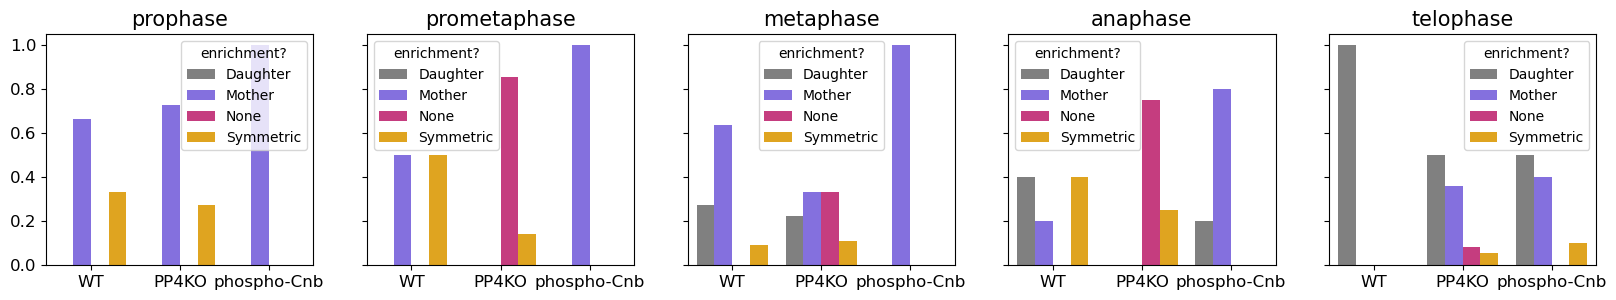

In [12]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols = 5,
                                                         nrows = 1,
                                                         sharex = True,
                                                         sharey = True,
                                                         figsize = (20,3))

axes = [ax1, ax2, ax3, ax4, ax5]
y_value = 'd/m'
o = ["prophase", "prometaphase", "metaphase", "anaphase", "telophase"]
p = ['grey', '#785EF0', '#DC267F' , '#FFB000'] #, purple, magenta, and yellow palette for color blindness
hue_order = ['Daughter', 'Mother', 'None', 'Symmetric']

for i in range(0,len(phases)):
    pf = counts[counts['phase']== o[i]] # gets data from current phase in list


    sns.barplot(x='Genotype', y='percent', hue='enrichment?', 
                data=pf, order=['WT', 'PP4KO', 'phospho-Cnb'], 
                palette=p, legend=True, ax = axes[i], hue_order = hue_order)

    axes[i].set_title(phases[i], fontsize = 15)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('', fontsize = 12)
    axes[i].tick_params(labelsize = 12)

#os.chdir(figs_dir)
#plt.savefig('supplemental bar plot frequencies.svg', dpi = 600, bbox_inches = 'tight')
plt.show();

In [13]:
counts
#os.chdir(outs_dir)
#counts.to_csv('OMX percents.csv')

,Genotype,phase,enrichment?,count,percent
0,PP4KO,anaphase,None,3,0.750000
1,PP4KO,anaphase,Symmetric,1,0.250000
2,PP4KO,metaphase,Daughter,2,0.222222
3,PP4KO,metaphase,Mother,3,0.333333
4,PP4KO,metaphase,None,3,0.333333
5,PP4KO,metaphase,Symmetric,1,0.111111
6,PP4KO,prometaphase,None,6,0.857143
7,PP4KO,prometaphase,Symmetric,1,0.142857
8,PP4KO,prophase,Mother,8,0.727273
9,PP4KO,prophase,Symmetric,3,0.272727


In [ ]:
wf = filt_data
wf['d/m log10'] = np.log10(wf['d/m'])
wf

o = ["prophase", "prometaphase", "metaphase", "anaphase", "telophase"]
p = ['grey', '#648FFF', '#FE6100'] #blue, purple, magenta, orange, and yellow palette for color blindness
ho = ['WT', 'PP4KO', 'phospho-Cnb']

sns.stripplot(x = 'phase', y = 'd/m log10', data = wf, hue = 'Genotype', dodge = True,
             order = o, palette = p, hue_order = ho, alpha = 1,
             size = 10, linewidth = 1, edgecolor = 'k')

sns.boxplot(x = 'phase', y = 'd/m log10', data = wf, hue = 'Genotype', dodge = True,
             order = o, palette = ['w', 'w', 'w'], hue_order = ho, legend = False)

plt.ylabel('Cnb D/M Ratio', fontsize = 15)
plt.xlabel('')
plt.yticks(size = 15)
plt.xticks(size = 10)
plt.title('Centrobin Log10 D/M Ratio', fontsize = 20, fontweight = 'bold')
plt.ylim(-2,2)
plt.axhline(y = 0, linestyle = '--', linewidth = 1, color = 'k')


# adding stats - PP4KO
ang = 0 # angle of rotation for plt.annotate text
y_value = 'd/m log10'
data = wf

for i in range(0, len(o)):
    phase = o[i]
    x_pos = i

    param1 = data[(data['Genotype']=='WT') & (data['phase'] == phase)][y_value].dropna()
    param2 = data[(data['Genotype']=='PP4KO') & (data['phase'] == phase)][y_value].dropna()
    p_value = independent_ttest(param1, param2, 0.05)[3]
    
    if p_value < 0.001:
        p_annot = '***'
        plt.annotate(p_annot, xy = (x_pos, param2.max()+0.2), ha = 'center', size = 25, rotation = ang)
    elif p_value < 0.01:
        p_annot = '**'
        plt.annotate(p_annot, xy = (x_pos, param2.max()+0.1), ha = 'center', size = 25, rotation = ang)
    elif p_value < 0.05:
        p_annot = '*'
        plt.annotate(p_annot, xy = (x_pos, param2.max()+0.2), ha = 'center', size = 25, rotation = ang)
    elif p_value > 0.05:
        p_annot = f"ns, p = {np.round(p_value, decimals = 3)}"
        plt.annotate(p_annot, xy = (x_pos, param2.max()+0.2), ha = 'center', rotation = ang)

# stats - phos-Cnb
for i in range(0, len(o)):
    phase = o[i]
    x_pos = i+0.3

    param1 = data[(data['Genotype']=='WT') & (data['phase'] == phase)][y_value].dropna()
    param2 = data[(data['Genotype']=='phospho-Cnb') & (data['phase'] == phase)][y_value].dropna()
    p_value = independent_ttest(param1, param2, 0.05)[3]
    
    if p_value < 0.001:
        p_annot = '***'
        plt.annotate(p_annot, xy = (x_pos, param2.max()+0.5), ha = 'center', size = 25, rotation = ang)
    elif p_value < 0.01:
        p_annot = '**'
        plt.annotate(p_annot, xy = (x_pos, param2.max()+0.5), ha = 'center', size = 25, rotation = ang)
    elif p_value < 0.05:
        p_annot = '*'
        plt.annotate(p_annot, xy = (x_pos, param2.max()+0.5), ha = 'center', size = 25, rotation = ang)
    elif p_value > 0.05:
        p_annot = f"ns"
        plt.annotate(p_annot, xy = (x_pos, param2.max()+0.5), ha = 'center', rotation = ang)





#os.chdir(figs_dir)
#plt.savefig('log10_combined stripplot_empty centrioles added.png', dpi = 600, bbox_inches = 'tight')
#plt.savefig('log10_combined stripplot_empty centrioles added.svg', dpi = 600, bbox_inches = 'tight')
plt.show();

In [ ]:
p = ['grey', '#3386FF', '#FF5733'] # classic blue and orange from the rotation saga
wf = filt_data[(filt_data['phase']=='telophase')]
wf = wf[wf['d/m'] < 15] # filters out outliers 
order = ['Daughter', 'Mother', 'None', 'Symmetric']
wf['d/m log10'] = np.log10(wf['d/m'])


y_value = 'd/m log10'

sns.stripplot(x = 'enrichment?', y = y_value, 
              data = wf, palette = p,
             hue = 'Genotype', hue_order = ['WT', 'PP4KO', 'phospho-Cnb'], dodge = True,
             size = 10, linewidth = 1, edgecolor = 'k', order = order)

sns.boxplot(x = 'enrichment?', y = y_value, 
              data = wf, palette = ['w','w','w'],
             hue = 'Genotype', hue_order = ['WT', 'PP4KO', 'phospho-Cnb'], dodge = True, 
           fill = True, legend = False, order = order)    


plt.xticks(fontsize = 15)
plt.xlabel('')
plt.yticks(fontsize = 15)
plt.ylabel('D/M Ratio', fontsize = 15)
plt.title('Telophase D/M Cnb Ratio', fontweight = 'bold', fontsize = 20)
plt.axhline(y = 0, linestyle = '--', color = 'k')
#plt.ylim(0,22, 2)

# stats
param1 = wf[wf['Genotype']=='WT'][y_value]


param2 = wf[(wf['Genotype']=='PP4KO') & (wf['enrichment?']=='Daughter')][y_value]
p1 = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 5)
plt.annotate(f"p = {p1}", xy = (-0.3,1.5))

param3 = wf[(wf['Genotype']=='PP4KO') & (wf['enrichment?']=='Mother')][y_value]
p2 = np.round(independent_ttest(param1, param3, 0.05)[3], decimals = 11)
plt.annotate(f"p = {p2}", xy = (0.7,0.5))

param4 = wf[(wf['Genotype']=='PP4KO') & (wf['enrichment?']=='None')][y_value]
p3 = np.round(independent_ttest(param1, param4, 0.05)[3], decimals = 5)
plt.annotate(f"p = {p3}", xy = (1.7,1.5))

param5 = wf[(wf['Genotype']=='PP4KO') & (wf['enrichment?']=='Symmetric')][y_value]
p4 = np.round(independent_ttest(param1, param5, 0.05)[3], decimals = 5)
plt.annotate(f"p = {p4}", xy = (2.7,0.5))

param6 = wf[(wf['Genotype']=='phospho-Cnb') & (wf['enrichment?']=='Daughter')][y_value]
p5 = np.round(independent_ttest(param1, param6, 0.05)[3], decimals = 5)
plt.annotate(f"p = {p5}", xy = (0.2,1.2))

param7 = wf[(wf['Genotype']=='phospho-Cnb') & (wf['enrichment?']=='Mother')][y_value]
p6 = np.round(independent_ttest(param1, param7, 0.05)[3], decimals = 5)
plt.annotate(f"p = {p6}", xy = (1.2,0.2))

param8 = wf[(wf['Genotype']=='phospho-Cnb') & (wf['enrichment?']=='Symmetric')][y_value]
p7 = np.round(independent_ttest(param1, param8, 0.05)[3], decimals = 5)
plt.annotate(f"p = {p7}", xy = (2.9,0.7))


plt.ylim(-2,2)

#os.chdir(figs_dir)
#plt.savefig('boxplots log10 telophase stats.png', dpi = 600, bbox_inches = 'tight')
#plt.savefig('boxplots log10 telophase stats.svg', dpi = 600, bbox_inches = 'tight')
plt.show();

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, levene

# Set up the stats table
stats_table = pd.DataFrame(columns=['control variable', 'experimental variable', 
                                    'phase', 'test', 'y-value',
                                    'control n', 'experimental n',
                                    'control mean', 'experimental mean',
                                    'control stdev', 'experimental stdev',
                                    'test statistic', 'degrees of freedom', 
                                    'critical value', 'p-value', 'significance'])

pd.set_option('display.float_format', '{:.2E}'.format)  # Scientific notation for p-values

# List of tests to iterate through
tests = [
    ['WT', 'PP4KO', 'prophase', 'd/m log10'],
    ['WT', 'phospho-Cnb', 'prophase', 'd/m log10'],

    ['WT', 'PP4KO', 'prometaphase', 'd/m log10'],
    ['WT', 'phospho-Cnb', 'prometaphase', 'd/m log10'],

    ['WT', 'PP4KO', 'metaphase', 'd/m log10'],
    ['WT', 'phospho-Cnb', 'metaphase', 'd/m log10'],

    ['WT', 'PP4KO', 'anaphase', 'd/m log10'],
    ['WT', 'phospho-Cnb', 'anaphase', 'd/m log10'],
    
    ['WT', 'PP4KO', 'telophase', 'd/m log10'],
    ['WT', 'phospho-Cnb', 'telophase', 'd/m log10']
    
]
stats_table

In [ ]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu, ranksums
import os

# Function to determine appropriate test
def is_parametric(data1, data2, alpha=0.05):
    # Check if both datasets have at least 3 samples
    if len(data1) < 3 or len(data2) < 3:
        return {'suitable_for_ttest': False, 'suggested_test': "Insufficient data"}
    
    # Check if data is numeric
    continuous = all(isinstance(x, (int, float)) for x in data1) and \
                 all(isinstance(x, (int, float)) for x in data2)
    if not continuous:
        return {'suitable_for_ttest': False, 'suggested_test': "Mann-Whitney U test"}

    # Shapiro-Wilk test for normality
    normality1 = shapiro(data1).pvalue > alpha
    normality2 = shapiro(data2).pvalue > alpha
    normality = normality1 and normality2

    # Levene's test for equal variances
    equal_variance = levene(data1, data2).pvalue > alpha

    # Determine if suitable for t-test
    suitable_for_ttest = normality and equal_variance
    if suitable_for_ttest:
        return {'suitable_for_ttest': True, 'suggested_test': "t-test"}
    
    # For small sample sizes, suggest Exact Wilcoxon Rank-Sum Test
    if len(data1) < 6 or len(data2) < 6:
        return {'suitable_for_ttest': False, 'suggested_test': "Exact Wilcoxon Rank-Sum Test"}
    
    return {'suitable_for_ttest': False, 'suggested_test': "Mann-Whitney U test"}

# Iterate through tests
for i, test_params in enumerate(tests):
    control_var, experimental_var, phase, y_value = test_params

    # Subset data for the current test
    param1 = data[(data['Genotype'] == control_var) & (data['phase'] == phase)][y_value].dropna()
    param2 = data[(data['Genotype'] == experimental_var) & (data['phase'] == phase)][y_value].dropna()

    # Populate descriptive stats
    stats_table.loc[i, 'control variable'] = control_var
    stats_table.loc[i, 'experimental variable'] = experimental_var
    stats_table.loc[i, 'phase'] = phase
    stats_table.loc[i, 'y-value'] = y_value
    stats_table.loc[i, 'control n'] = len(param1)
    stats_table.loc[i, 'experimental n'] = len(param2)
    stats_table.loc[i, 'control mean'] = param1.mean()
    stats_table.loc[i, 'experimental mean'] = param2.mean()
    stats_table.loc[i, 'control stdev'] = param1.std()
    stats_table.loc[i, 'experimental stdev'] = param2.std()

    # Determine appropriate test
    test_result = is_parametric(param1, param2)
    suggested_test = test_result['suggested_test']

    # Skip tests if data is insufficient
    if suggested_test == "Insufficient data":
        stats_table.loc[i, ['test', 'test statistic', 'degrees of freedom', 
                            'critical value', 'p-value', 'significance']] = 'NA'
        continue

    if suggested_test == "t-test":
        t_stat, p_value = ttest_ind(param1, param2)
        stats_table.loc[i, 'test'] = "Unpaired Student's T-test"
        stats_table.loc[i, 'test statistic'] = t_stat
        stats_table.loc[i, 'degrees of freedom'] = len(param1) + len(param2) - 2
        stats_table.loc[i, 'critical value'] = "N/A"  # Not applicable for this summary
    elif suggested_test == "Mann-Whitney U test":
        u_stat, p_value = mannwhitneyu(param1, param2, alternative='two-sided')
        stats_table.loc[i, 'test'] = "Mann-Whitney U Test"
        stats_table.loc[i, 'test statistic'] = u_stat
        stats_table.loc[i, 'degrees of freedom'] = "N/A"  # Not applicable for this test
        stats_table.loc[i, 'critical value'] = "N/A"  # Not applicable for this test
    elif suggested_test == "Exact Wilcoxon Rank-Sum Test":
        r_stat, p_value = ranksums(param1, param2)
        stats_table.loc[i, 'test'] = "Exact Wilcoxon Rank-Sum Test"
        stats_table.loc[i, 'test statistic'] = r_stat
        stats_table.loc[i, 'degrees of freedom'] = "N/A"  # Not applicable for this test
        stats_table.loc[i, 'critical value'] = "N/A"  # Not applicable for this test

    # Record p-value in scientific notation
    stats_table.loc[i, 'p-value'] = f"{p_value:.5e}"

    # Add significance stars
    if p_value < 0.0001:
        sig = "****"
    elif p_value < 0.001:
        sig = "***"
    elif p_value < 0.01:
        sig = "**"
    elif p_value < 0.05:
        sig = "*"
    else:
        sig = "ns"
    stats_table.loc[i, 'significance'] = sig

stats_table
# Save output stats table
#os.chdir(outs_dir)
#stats_table.to_csv('global OMX stats.csv')
os.chdir(home_dir)


# Stats Table

In [ ]:
import builtins
sum = builtins.sum

stats_table = pd.DataFrame(columns = ['control variable', 'experimental variable', 'phase', 'test',
                                      'control n', 'experimental n',
                                     'test statistic', 'degrees of freedom', 'p-value'])
stats_table

In [ ]:
# test# = control genotype, experimental genotype, phase,
        # control percents, experimental counts, wt counts

# frequency is D, M, S, N

t1 = ['WT', 'PP4KO', 'prophase', # genotypes, phase
     0.01, 0.66, 0.32, 0.01, # WT frequency (D, M, S, N)
     0, 8, 3, 0, # experimental counts
     0, 4, 2, 0] # WT counts

t2 = ['WT', 'phospho-Cnb', 'prophase', # genotypes, phase
     0.01, 0.66, 0.32, 0.01, # WT frequency (D, M, S, N)
     0, 5, 0, 0, # experimental counts
     0, 4, 2, 0] # WT counts

### --- --- --- ###

t3 = ['WT', 'PP4KO', 'prometaphase', # genotypes, phase
     0, 0.5, 0.5, 0, # WT frequency (D, M, S, N)
     0, 0, 1, 6, # experimental counts
     0, 1, 1, 0] # WT counts

t4 = ['WT', 'phospho-Cnb', 'prometaphase', # genotypes, phase
     0, 0.5, 0.5, 0, # WT frequency (D, M, S, N)
     0, 8, 0, 0, # experimental counts
     0, 1, 1, 0] # WT counts

### --- --- --- ###

t5 = ['WT', 'PP4KO', 'metaphase', # genotypes, phase
     0.27, 0.64, 0.09, 0, # WT frequency (D, M, S, N)
     2, 3, 3, 1, # experimental counts
     3, 7, 1, 0] # WT counts

t6 = ['WT', 'phospho-Cnb', 'metaphase', # genotypes, phase
     0.27, 0.64, 0.09, 0, # WT frequency (D, M, S, N)
     0, 9, 0, 0, # experimental counts
     3, 7, 1, 0] # WT counts

### --- --- --- ###

t7 = ['WT', 'PP4KO', 'anaphase', # genotypes, phase
     0.4, 0.2, 0.4, 0, # WT frequency (D, M, S, N)
     0, 0, 1, 3, # experimental counts
     2, 1, 1, 0] # WT counts

t8 = ['WT', 'phospho-Cnb', 'anaphase', # genotypes, phase
     0.4, 0.2, 0.4, 0, # WT frequency (D, M, S, N)
     1, 4, 0, 0, # experimental counts
     2, 1, 1, 0] # WT counts

### --- --- --- ###

t9 = ['WT', 'PP4KO', 'telophase', # genotypes, phase
     1, 0, 0, 0, # WT frequency (D, M, S, N)
     18, 13, 2, 3, # experimental counts
     17, 0, 0, 0] # WT counts

t10 = ['WT', 'phospho-Cnb', 'telophase', # genotypes, phase
     1, 0, 0, 0, # WT frequency (D, M, S, N)
     0, 4, 1, 0, # experimental counts
     17, 0, 0, 0] # WT counts

tests = [t1, t2, t3, t4, t5, t6, t7, t8, t9, t10]

In [ ]:
t1[3:7]

In [ ]:
chi2_stat, p_value = chisquare(f_obs=[0,8,3,0], f_exp=[0.11, 7.26, 3.52, 0.11])
chi2_stat
p_value

In [ ]:
from scipy.stats import chisquare
import pandas as pd
import numpy as np


for i in range(0, len(tests)):
    stats_table.loc[i, 'control variable'] = tests[i][0]
    stats_table.loc[i, 'experimental variable'] = tests[i][1]
    stats_table.loc[i, 'phase'] = tests[i][2]

    # Extract observed counts and WT percentages
    observed = tests[i][7:11]  # experimental counts
    wt_percent = tests[i][3:7]  # WT percentages

    total_counts = sum(observed)  # Total counts in experimental condition
    expected = [p * total_counts for p in wt_percent]

    # Prevent zero values in expected counts
    expected = [max(e, 1e-10) for e in expected]  # Replace zeros with small constant

    # Perform chi-squared test
    chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

    # Store results in stats_table
    stats_table.loc[i, 'control n'] = np.sum(tests[i][11:])
    stats_table.loc[i, 'experimental n'] = np.sum(observed)
    stats_table.loc[i, 'test statistic'] = chi2_stat
    stats_table.loc[i, 'p-value'] = p_value
    stats_table.loc[i, 'degrees of freedom'] = len(observed) - 1


    if p_value < 0.0001:
        sig = "****"
    elif p_value < 0.001:
        sig = "***"
    elif p_value < 0.01:
        sig = "**"
    elif p_value < 0.05:
        sig = "*"
    elif p_value > 0.05:
        sig = "ns"
    stats_table.loc[i, 'significance'] = sig
    
# Add test description
stats_table['test'] = "Chi^2 goodness of fit"

stats_table
#stats_table.to_csv('chi squared stats.csv')
